In [1]:
""""
Data Project - Stock Market Analysis
In this portfolio project we will be
looking at data from the stock market, particularly some technology 
stocks. We will learn how to use pandas to get stock information, 
visualize different aspects of it, and finally we will look at a few 
ways of analyzing the risk of a stock, based on its previous performance
history. We will also be predicting future stock prices through a Monte
Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?
2.) What was the daily return of the stock on average?
3.) What was the moving average of the various stocks?
4.) What was the correlation between different stocks' closing prices?
4.) What was the correlation between different stocks' daily returns?
5.) How much value do we put at risk by investing in a particular stock?
6.) How can we attempt to predict future stock behavior?
"""

'"\nData Project - Stock Market Analysis\nIn this portfolio project we will be\nlooking at data from the stock market, particularly some technology \nstocks. We will learn how to use pandas to get stock information, \nvisualize different aspects of it, and finally we will look at a few \nways of analyzing the risk of a stock, based on its previous performance\nhistory. We will also be predicting future stock prices through a Monte\nCarlo method!\n\nWe\'ll be answering the following questions along the way:\n\n1.) What was the change in price of the stock over time?\n2.) What was the daily return of the stock on average?\n3.) What was the moving average of the various stocks?\n4.) What was the correlation between different stocks\' closing prices?\n4.) What was the correlation between different stocks\' daily returns?\n5.) How much value do we put at risk by investing in a particular stock?\n6.) How can we attempt to predict future stock behavior?\n'

In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [10]:
pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
     ---------------------------------------- 3.6/3.6 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 62.8/62.8 KB 335.1 kB/s eta 0:00:00
     -------------------------------------- 61.2/61.2 KB 808.3 kB/s eta 0:00:00
     ------------------------------------ 160.2/160.2 KB 600.0 kB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 KB 1.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\Federico Baraldi\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [13]:
from pandas_datareader import data 

In [14]:
from datetime import datetime

In [15]:
from __future__ import division

In [16]:
tech_list=['AAPL','GOOG','MSFT','AMZN']

In [17]:
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [18]:
end

datetime.datetime(2022, 8, 31, 13, 56, 47, 604943)

In [19]:
start

datetime.datetime(2021, 8, 31, 0, 0)

In [20]:
from pandas_datareader.data import DataReader

In [21]:
for stock in tech_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [22]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-31,152.800003,151.289993,152.660004,151.830002,86453100.0,150.983963
2021-09-01,154.979996,152.339996,152.830002,152.509995,80313700.0,151.660156
2021-09-02,154.720001,152.399994,153.869995,153.649994,71115500.0,152.793808
2021-09-03,154.630005,153.089996,153.759995,154.300003,57808700.0,153.440186
2021-09-07,157.259995,154.389999,154.970001,156.690002,82278300.0,155.816895
...,...,...,...,...,...,...
2022-08-24,168.110001,166.250000,167.320007,167.529999,53841500.0,167.529999
2022-08-25,170.139999,168.350006,168.779999,170.029999,51218200.0,170.029999
2022-08-26,171.050003,163.559998,170.570007,163.619995,78823500.0,163.619995


In [23]:
GOOG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-31,146.112000,145.000000,145.884506,145.462006,26756000.0,145.462006
2021-09-01,146.820496,145.614502,145.649994,145.841995,15824000.0,145.841995
2021-09-02,146.324997,144.106506,145.949493,144.218994,21844000.0,144.218994
2021-09-03,145.376999,143.505005,144.145996,144.774994,19104000.0,144.774994
2021-09-07,145.824005,144.541000,144.749496,145.518997,15170000.0,145.518997
...,...,...,...,...,...,...
2022-08-24,115.717003,113.779999,114.449997,114.699997,16051200.0,114.699997
2022-08-25,117.779999,115.050003,115.150002,117.699997,14874700.0,117.699997
2022-08-26,116.599998,111.220001,115.809998,111.300003,31664800.0,111.300003


In [24]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,160.055119,156.229682,158.057659,158.216469,8.812783e+07,157.725151
std,12.660533,12.530808,12.657038,12.585816,2.642225e+07,12.555132
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,129.879593
25%,149.437500,146.515003,148.302494,148.382500,6.947065e+07,147.797485
50%,161.495003,156.340004,158.954994,159.065002,8.237185e+07,158.704758
75%,171.057503,167.220001,169.232502,168.970005,1.002058e+08,168.630119
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.259918


In [25]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-08-31 to 2022-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

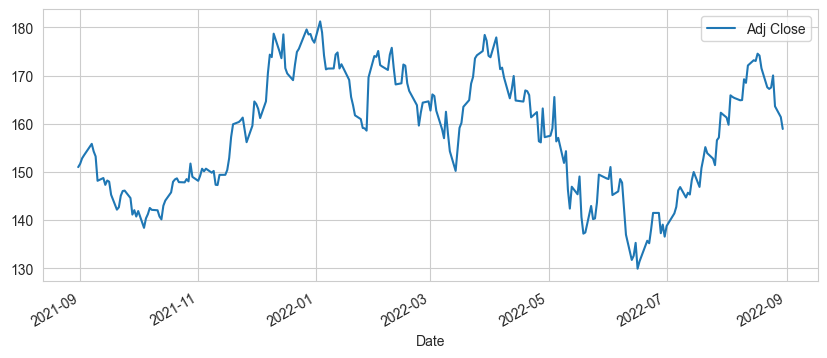

In [26]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

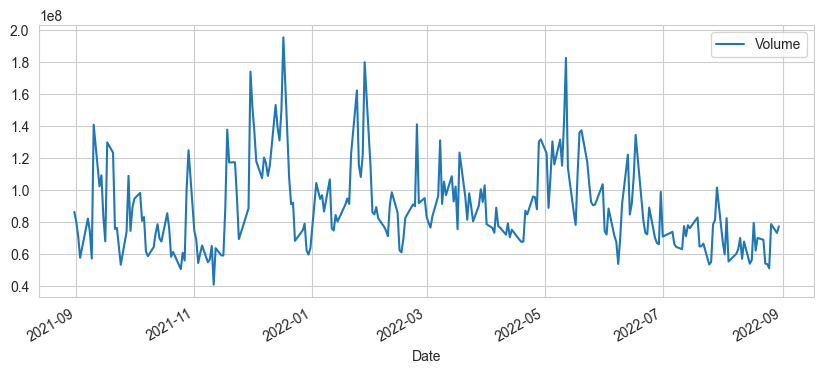

In [27]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [28]:
url1='http://www.investopedia.com/terms/m/movingaverage.asp'
url2='http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp'


In [33]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name="MA for %s days" %(str(ma))
    
    AAPL[column_name]=pd.Series(AAPL['Adj Close']).rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

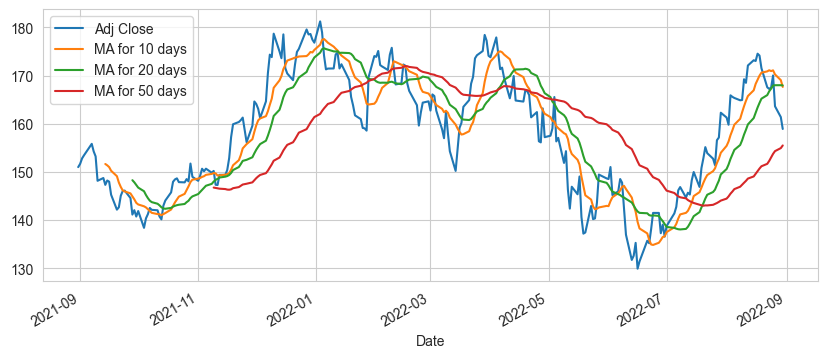

In [34]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

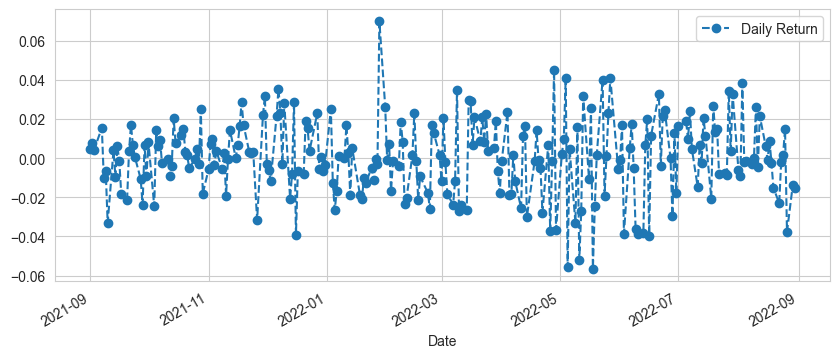

In [35]:
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

c:\Users\Federico Baraldi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

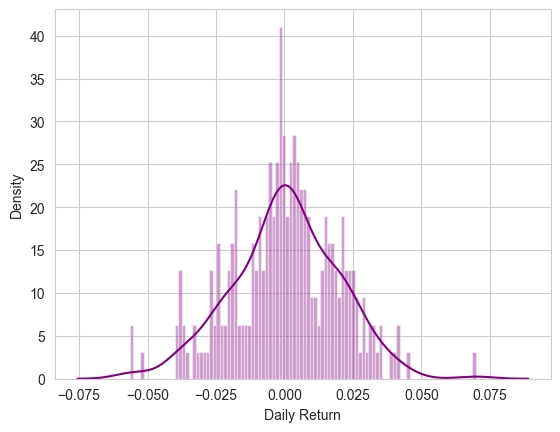

In [36]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

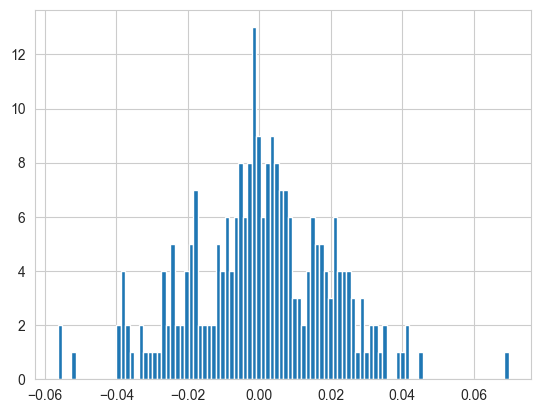

In [37]:
AAPL['Daily Return'].hist(bins=100)

In [38]:
closing_df=DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [39]:
closing_df[0:10]

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-31,150.983963,145.462006,299.372772,173.539505
2021-09-01,151.660141,145.841995,299.323151,173.949997
2021-09-02,152.793823,144.218994,298.648804,173.156006
2021-09-03,153.440201,144.774994,298.638916,173.902496
2021-09-07,155.816895,145.518997,297.686859,175.464493
2021-09-08,154.245667,144.883499,297.716583,176.274994
2021-09-09,153.211487,144.913498,294.781219,174.207993
2021-09-10,148.139908,141.921005,293.253967,173.457504
2021-09-13,148.716675,143.464996,294.523346,172.858505


In [40]:
tech_rets=closing_df.pct_change()

In [41]:
tech_rets[0:10]

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-31,NaN,NaN,NaN,NaN
2021-09-01,0.004478,0.002612,-0.000166,0.002365
2021-09-02,0.007475,-0.011128,-0.002253,-0.004564
2021-09-03,0.004230,0.003855,-0.000033,0.004311
2021-09-07,0.015489,0.005139,-0.003188,0.008982
2021-09-08,-0.010084,-0.004367,0.000100,0.004619
2021-09-09,-0.006705,0.000207,-0.009860,-0.011726
2021-09-10,-0.033102,-0.020650,-0.005181,-0.004308
2021-09-13,0.003893,0.010879,0.004329,-0.003453


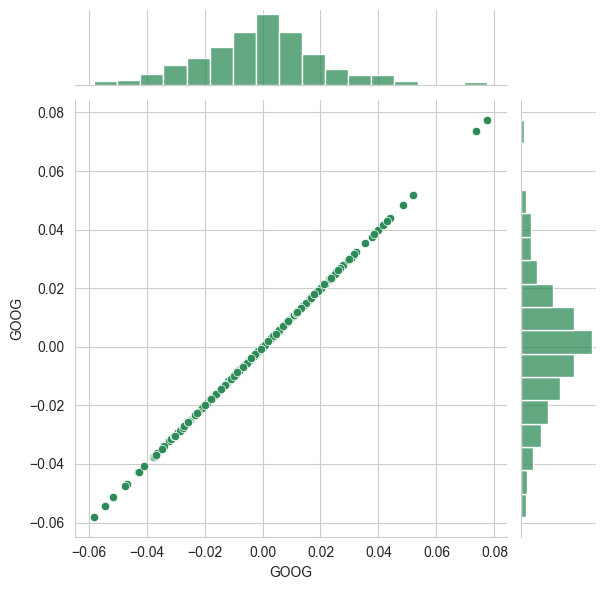

In [42]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind='scatter',color='seagreen')

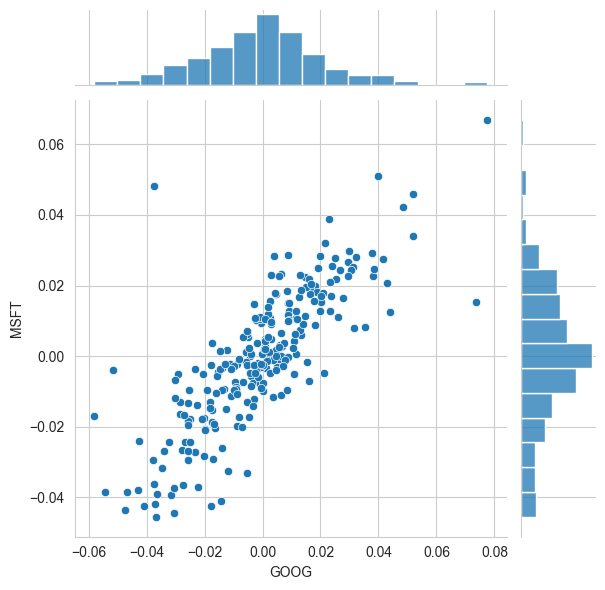

In [43]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind='scatter')

In [44]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-31,NaN,NaN,NaN,NaN
2021-09-01,0.004478,0.002612,-0.000166,0.002365
2021-09-02,0.007475,-0.011128,-0.002253,-0.004564
2021-09-03,0.004230,0.003855,-0.000033,0.004311
2021-09-07,0.015489,0.005139,-0.003188,0.008982


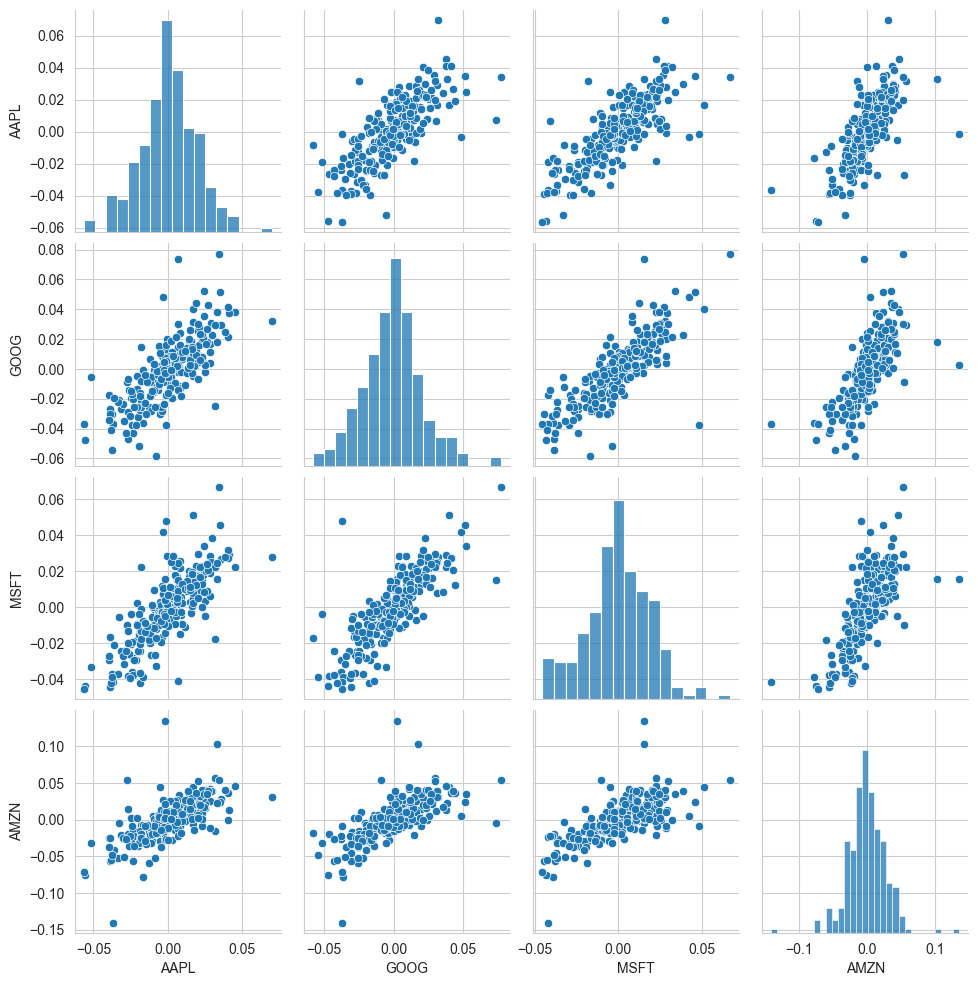

In [45]:
sns.pairplot(tech_rets.dropna())

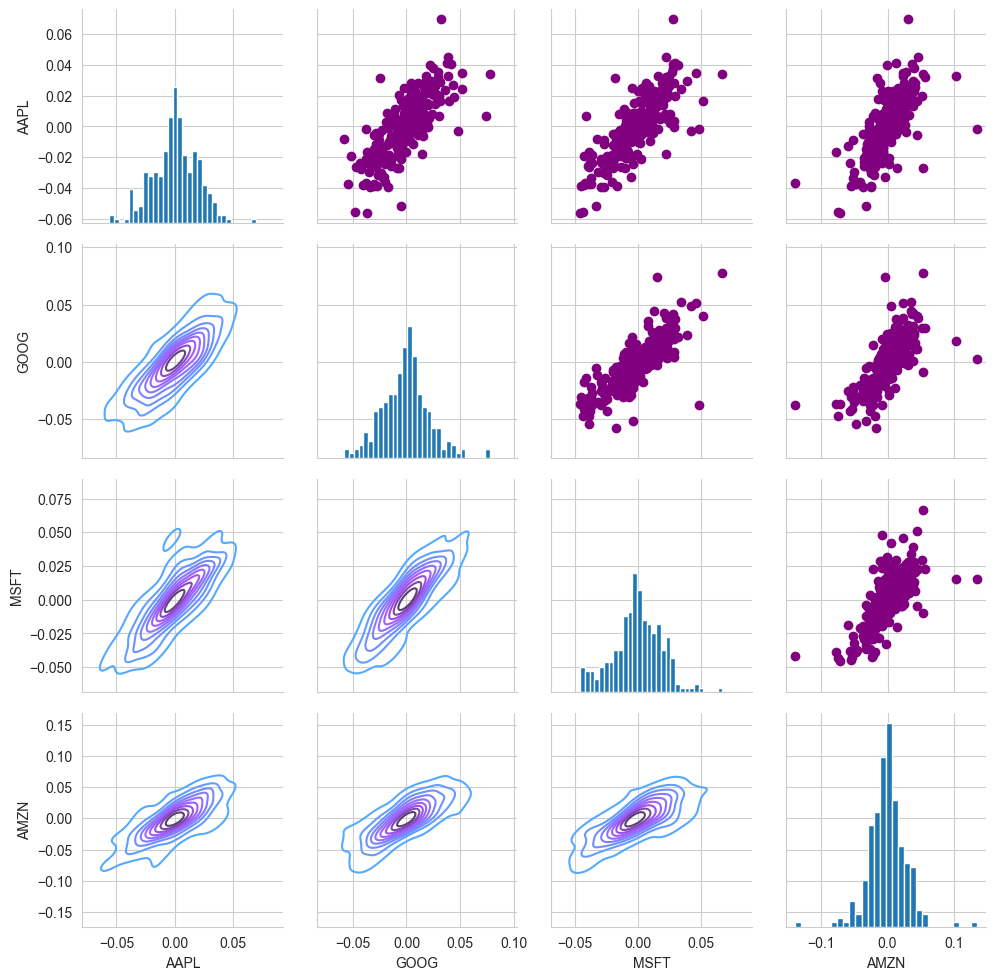

In [46]:
returns_fig=sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

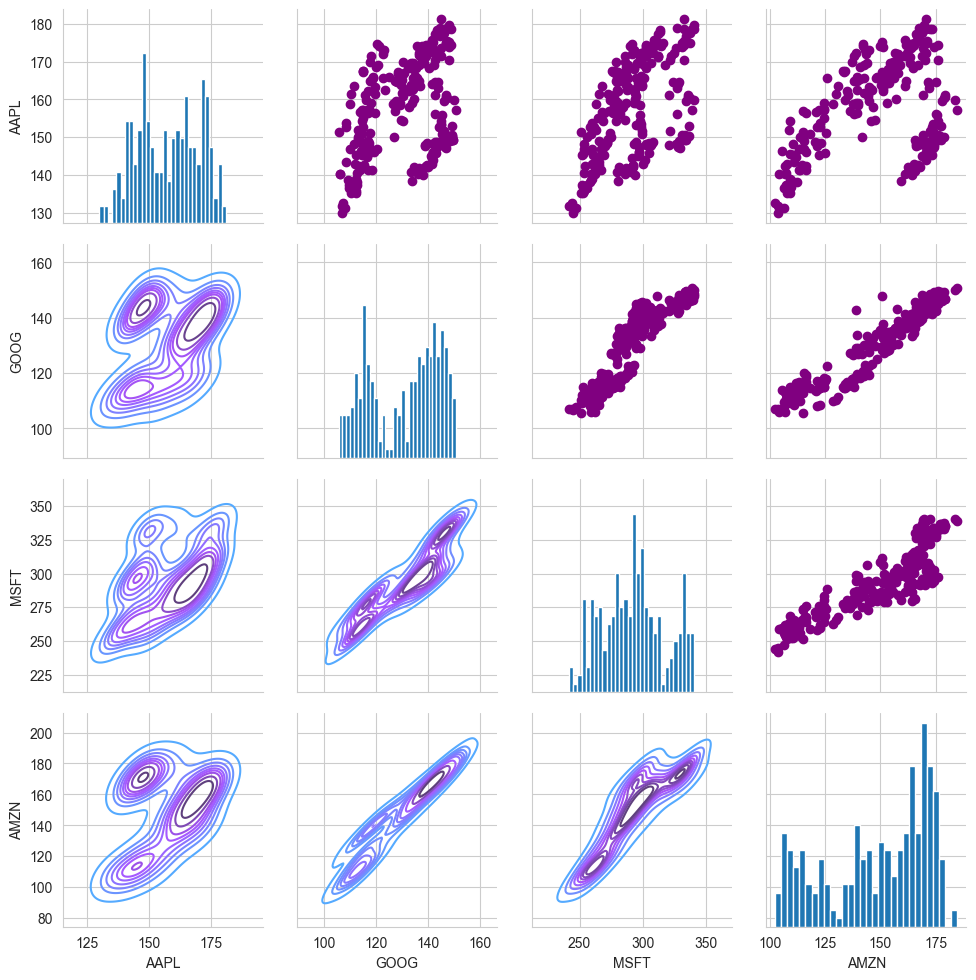

In [47]:
returns_fig=sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

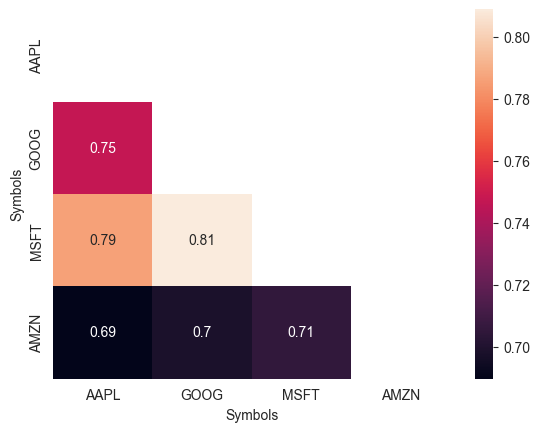

In [48]:
corr=tech_rets.dropna().corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,mask=mask)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

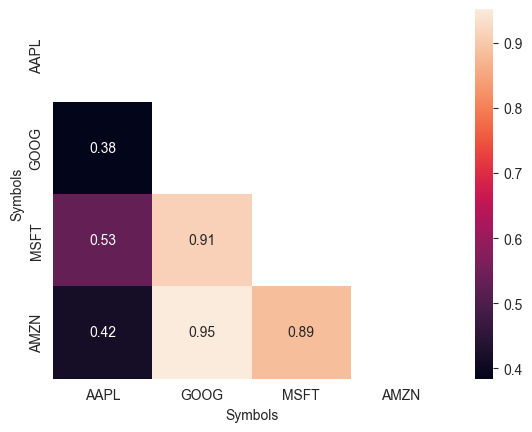

In [49]:
corr=closing_df.dropna().corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,annot=True,mask=mask)

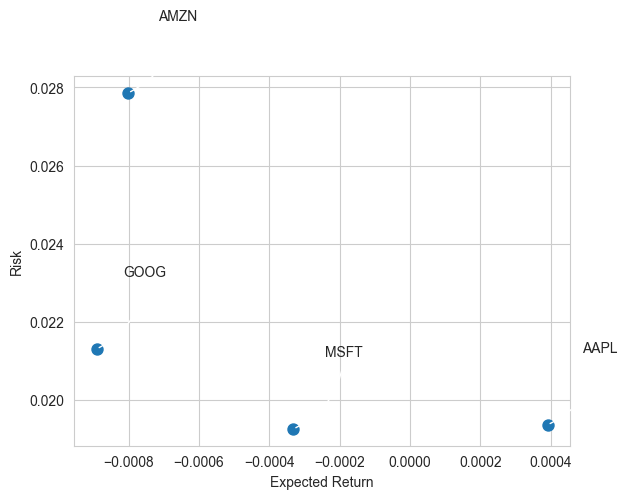

In [50]:
rets=tech_rets.dropna()

area=np.pi*20

plt.scatter(rets.mean(),rets.std(),s= area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y, in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y), xytext=(50,50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3')
    )

c:\Users\Federico Baraldi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

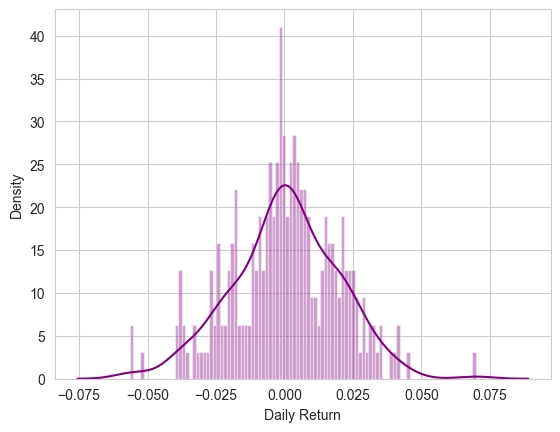

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [52]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-09-01,0.004478,0.002612,-0.000166,0.002365
2021-09-02,0.007475,-0.011128,-0.002253,-0.004564
2021-09-03,0.004230,0.003855,-0.000033,0.004311
2021-09-07,0.015489,0.005139,-0.003188,0.008982
2021-09-08,-0.010084,-0.004367,0.000100,0.004619


In [53]:
rets['AAPL'].quantile(0.05)

-0.033145499725904026

In [54]:
days=365
dt=1/days
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [55]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
    return price
    

In [56]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-31,146.112000,145.000000,145.884506,145.462006,26756000.0,145.462006
2021-09-01,146.820496,145.614502,145.649994,145.841995,15824000.0,145.841995
2021-09-02,146.324997,144.106506,145.949493,144.218994,21844000.0,144.218994
2021-09-03,145.376999,143.505005,144.145996,144.774994,19104000.0,144.774994
2021-09-07,145.824005,144.541000,144.749496,145.518997,15170000.0,145.518997


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

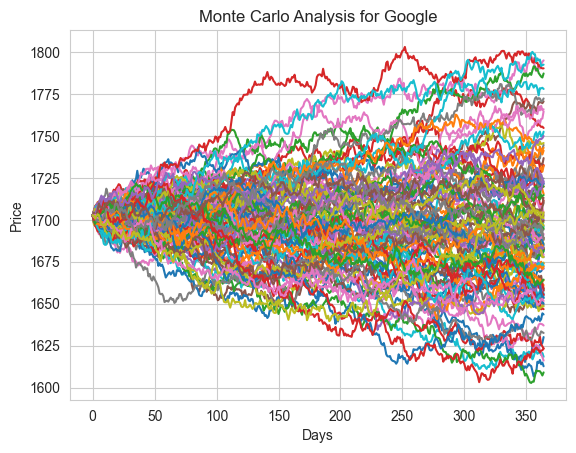

In [57]:
start_price=1702.630005

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [58]:
runs=10000

simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

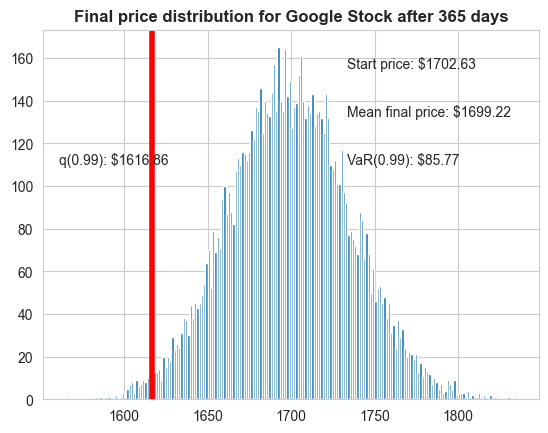

In [59]:
q=np.percentile(simulations,1)
plt.hist(simulations,bins=200)
plt.figtext(0.6,0.8,s="Start price: $%.2f"%start_price)
plt.figtext(0.6,0.7,"Mean final price: $%.2f"%simulations.mean())
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f"%(start_price-q))
plt.figtext(0.15,0.6,s="q(0.99): $%.2f"%q)
plt.axvline(x=q,linewidth=4,color='r')
plt.title("Final price distribution for Google Stock after %s days"%days, weight='bold');